In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('colorblind')

In [3]:
pretrained_df = pd.read_csv("data/pretrained_island_effects.csv")
pretrained_df.head()

,model,construction,condition,gap,gram,ungram,wh_effect
0,grnn,Wh-Movement,Simple,+gap,I know who the family from the big city saw la...,I know that the family from the big city saw l...,-1.910231
1,grnn,Wh-Movement,Simple,-gap,I know that the family from the big city saw t...,I know who the family from the big city saw th...,0.583257
2,grnn,Wh-Movement,Simple,+gap,I remember what the woman with the blue hat bo...,I remember that the woman with the blue hat bo...,-3.269071
3,grnn,Wh-Movement,Simple,-gap,I remember that the woman with the blue hat bo...,I remember what the woman with the blue hat bo...,6.700210
4,grnn,Wh-Movement,Simple,+gap,The newspaper reported who the man from far aw...,The newspaper reported that the man from far a...,-0.152476


In [4]:
augmented_df = pd.read_csv("data/augmented_island_effects.csv")
augmented_df.head()

,model,construction,condition,gap,gram,ungram,wh_effect
0,cleft,Wh-Movement,Simple,+gap,I know who the family from the big city saw la...,I know that the family from the big city saw l...,-3.157723
1,cleft,Wh-Movement,Simple,-gap,I know that the family from the big city saw t...,I know who the family from the big city saw th...,3.212996
2,cleft,Wh-Movement,Simple,+gap,I remember what the woman with the blue hat bo...,I remember that the woman with the blue hat bo...,-1.855624
3,cleft,Wh-Movement,Simple,-gap,I remember that the woman with the blue hat bo...,I remember what the woman with the blue hat bo...,4.361690
4,cleft,Wh-Movement,Simple,+gap,The newspaper reported who the man from far aw...,The newspaper reported that the man from far a...,-0.475909


In [6]:
combined_effects = pd.concat([pretrained_df, augmented_df])

# Cleft-RNN

In [77]:
cleft_data = combined_effects[combined_effects['model'].isin(['grnn', 'cleft'])]
cleft_data['model'] = cleft_data['model'].apply(lambda model: "before" if model == "grnn" else "after")

/var/folders/23/7hcv_qtd60j5mx97z8mfdjgh0000gn/T/ipykernel_40099/1154589651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleft_data['model'] = cleft_data['model'].apply(lambda model: "before" if model == "grnn" else "after")


In [78]:
cleft_data.columns

Index(['model', 'construction', 'condition', 'gap', 'gram', 'ungram',
       'wh_effect'],
      dtype='object')

In [96]:
cleft_data.head()

,model,construction,condition,gap,gram,ungram,wh_effect
0,before,Wh-Movement,Simple,+gap,I know who the family from the big city saw la...,I know that the family from the big city saw l...,-1.910231
1,before,Wh-Movement,Simple,-gap,I know that the family from the big city saw t...,I know who the family from the big city saw th...,0.583257
2,before,Wh-Movement,Simple,+gap,I remember what the woman with the blue hat bo...,I remember that the woman with the blue hat bo...,-3.269071
3,before,Wh-Movement,Simple,-gap,I remember that the woman with the blue hat bo...,I remember what the woman with the blue hat bo...,6.700210
4,before,Wh-Movement,Simple,+gap,The newspaper reported who the man from far aw...,The newspaper reported that the man from far a...,-0.152476


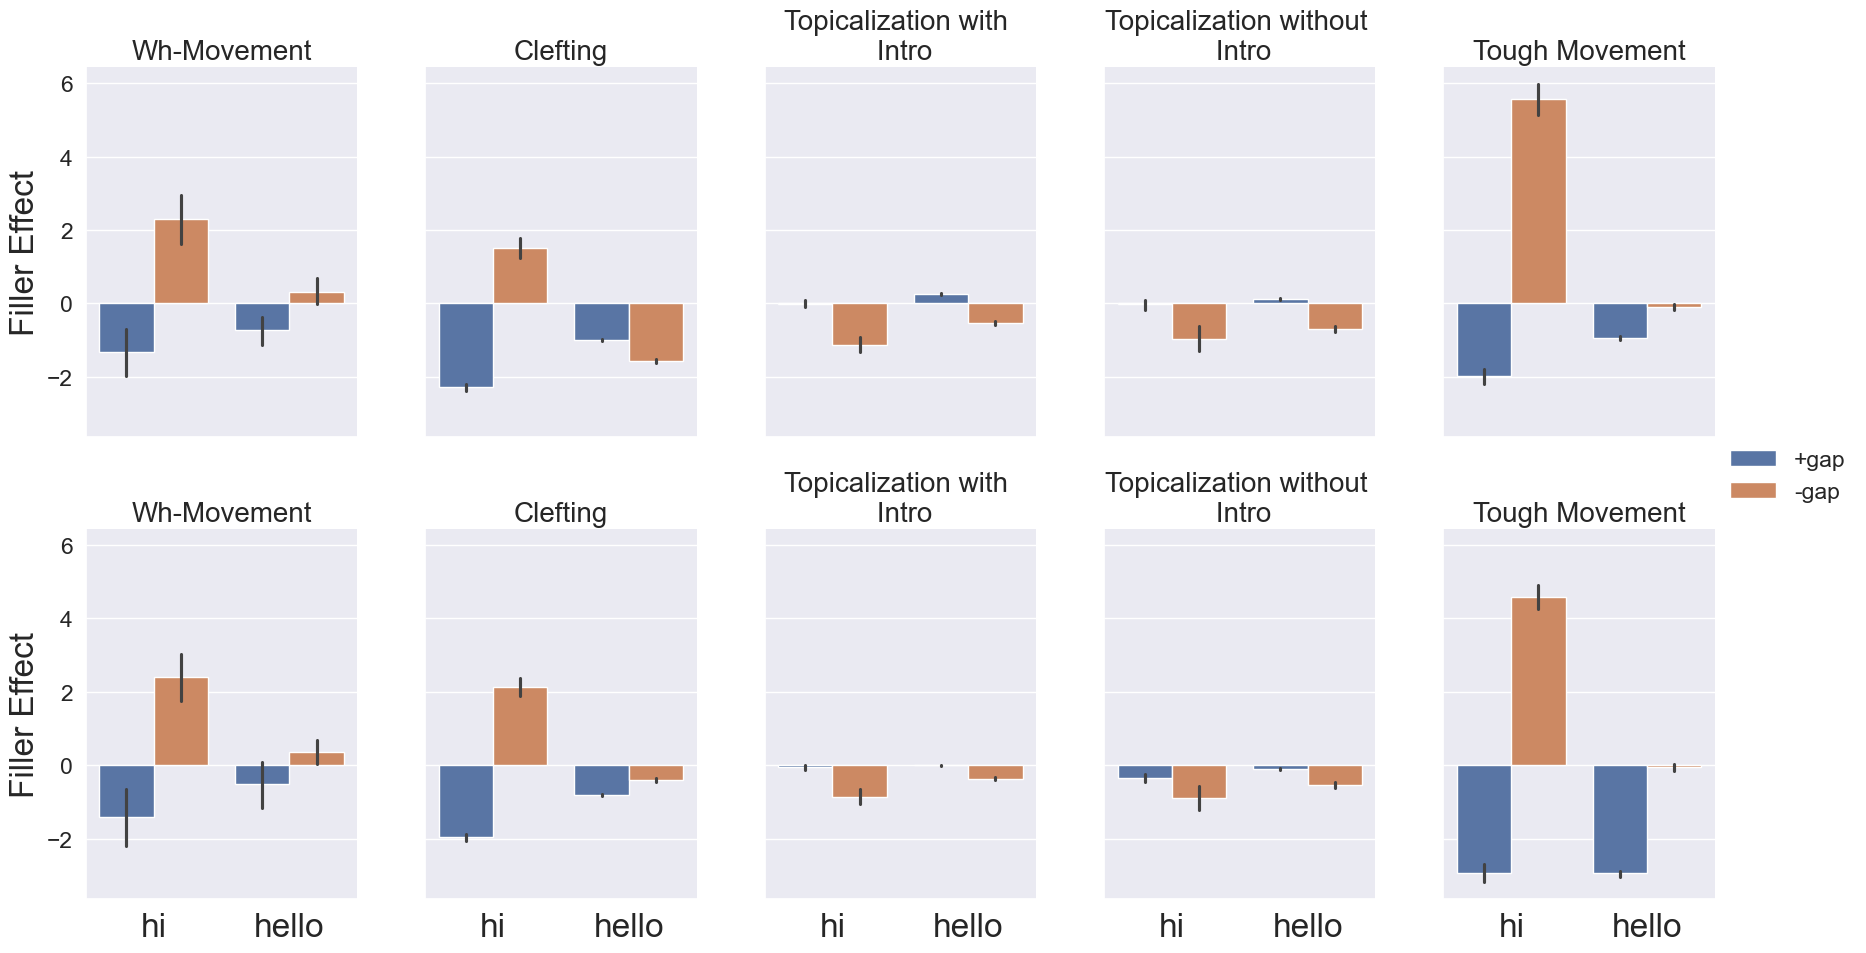

In [100]:
# rename model to before & after
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=cleft_data, kind="bar", col = "construction", row = "model",
            estimator="mean", aspect = 0.7)
g.set_axis_labels("", "Filler Effect", fontsize = 24)
g.set_xticklabels(["Simple" , "Island"], size = 24)
g.set_titles(template="{col_name}", size = 20)
g.fig.subplots_adjust(hspace=0.25, wspace=0.25)
constructions = ['Wh-Movement', 'Clefting', 'Topicalization with Intro',
       'Topicalization without Intro', 'Tough Movement']


for ax in g.axes.flatten():
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["hi", "hello"], size=24)

#for i, ax in enumerate(g.axes[:, 0]):  # Iterate through each row
   # ax.text(1.2, 1.15, f'{constructions[i]}', transform=ax.transAxes, 
           # ha='center', va='center', fontsize = 24)

g.legend.set_title("")

## Topic RNN

/var/folders/23/7hcv_qtd60j5mx97z8mfdjgh0000gn/T/ipykernel_40099/4213211621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_data['model'] = topic_data['model'].apply(lambda model: "before" if model == "grnn" else "after")


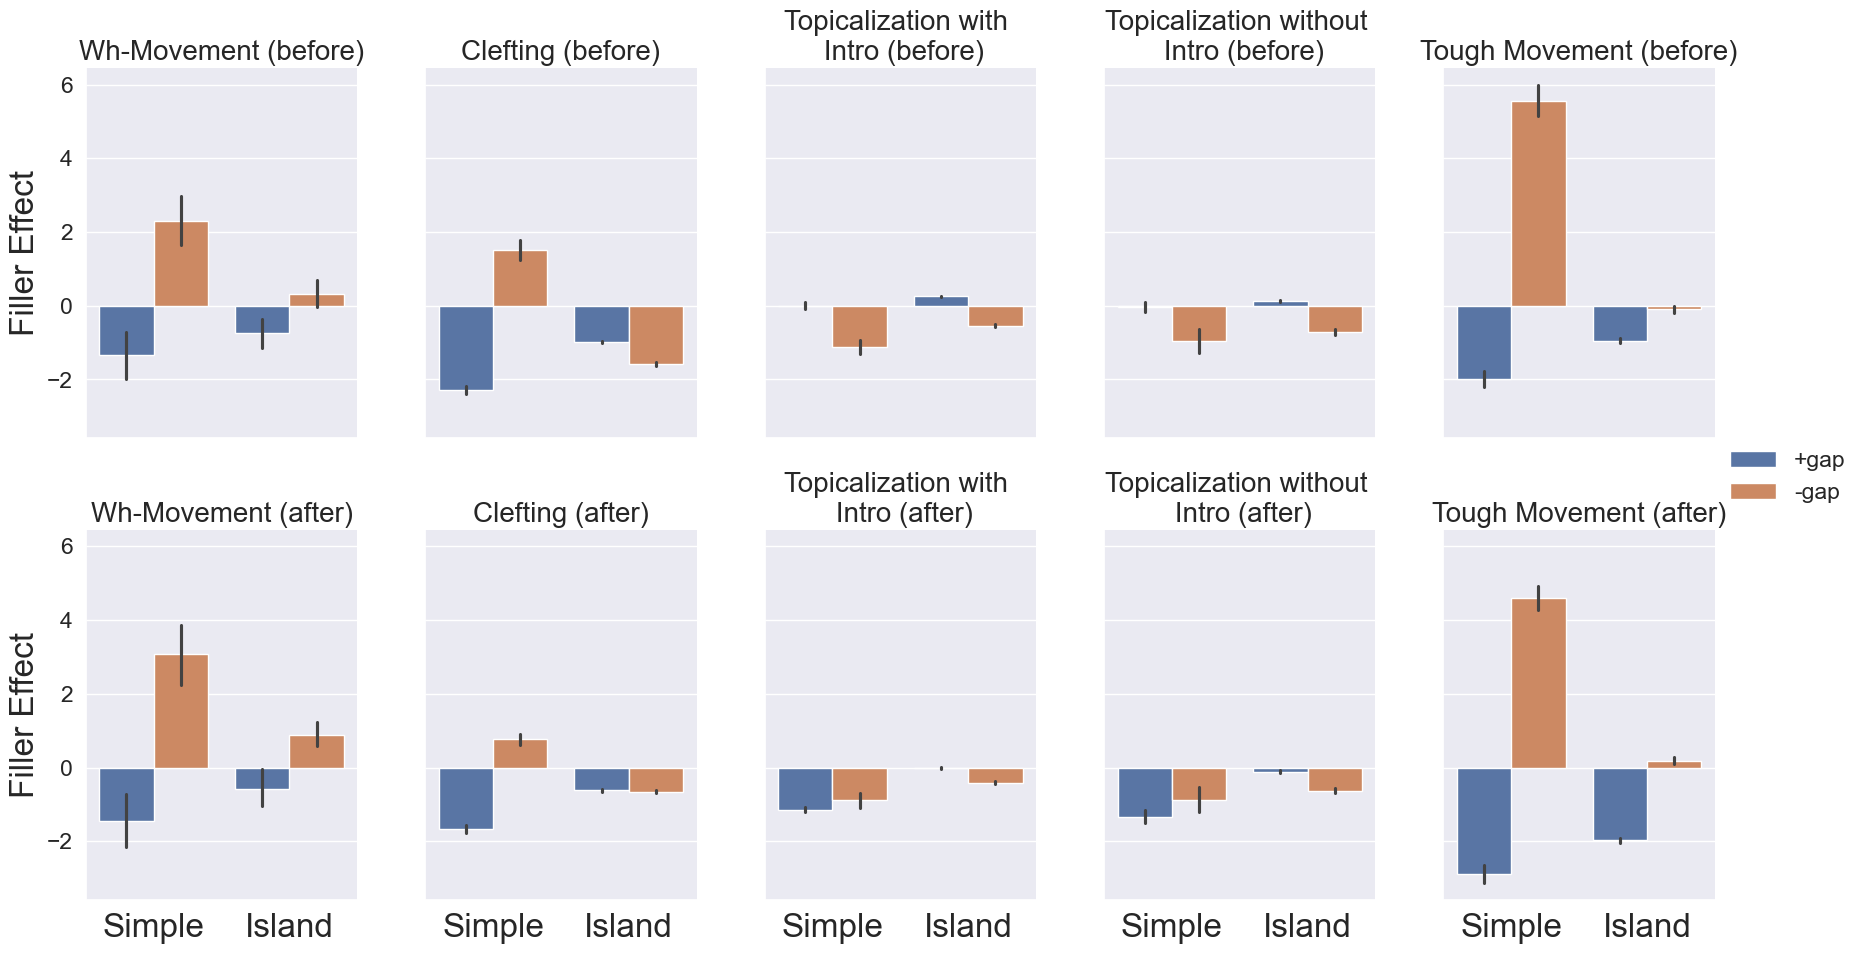

In [103]:
topic_data = combined_effects[combined_effects['model'].isin(['grnn', 'intro_topic'])]
topic_data['model'] = topic_data['model'].apply(lambda model: "before" if model == "grnn" else "after")
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=topic_data, kind="bar", col = "construction", row = "model",
            estimator="mean", aspect = 0.7)
g.set_axis_labels("", "Filler Effect", fontsize = 24)
g.set_xticklabels(["Simple" , "Island"], size = 24)

g.set_titles(template="{col_name} ({row_name})", size = 20)
g.fig.subplots_adjust(hspace=0.25, wspace=0.25)
constructions = ['Wh-Movement', 'Clefting', 'Topicalization with Intro',
       'Topicalization without Intro', 'Tough Movement']

g.legend.set_title("")